# SMA crossover strategies

In [36]:
import pandas as pd

In [41]:
df = pd.read_csv('eurusd.csv', index_col="Date", parse_dates=["Date"])
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [39]:
# Define short and long window
sma_s = 50
sma_l = 200

In [42]:
df["sma_s"] = df.price.rolling(sma_s).mean()
df["sma_l"] = df.price.rolling(sma_l).mean()
df

,price,sma_s,sma_l
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


<AxesSubplot:title={'center':'EUR/USD - SMA50 | SMA200'}, xlabel='Date'>

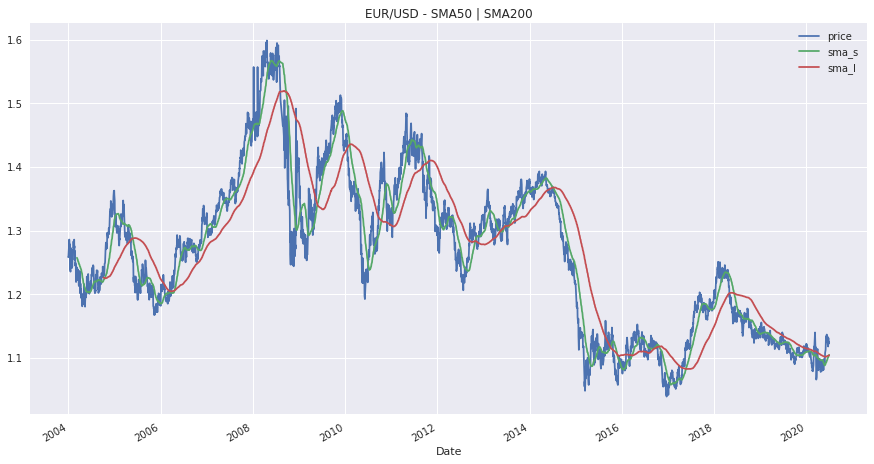

In [45]:
# plot
import matplotlib.pyplot as plt
plt.style.use('seaborn')

df.plot(figsize=(15, 8), title=f"EUR/USD - SMA{sma_s} | SMA{sma_l}")

In [46]:
# find the starting date
df.dropna(inplace=True)

In [47]:
df

,price,sma_s,sma_l
Date,,,
2004-10-06,1.228094,1.221318,1.226222
2004-10-07,1.229906,1.221840,1.226081
2004-10-08,1.241003,1.222628,1.225995
2004-10-11,1.238405,1.223352,1.225843
2004-10-12,1.232104,1.223888,1.225643
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


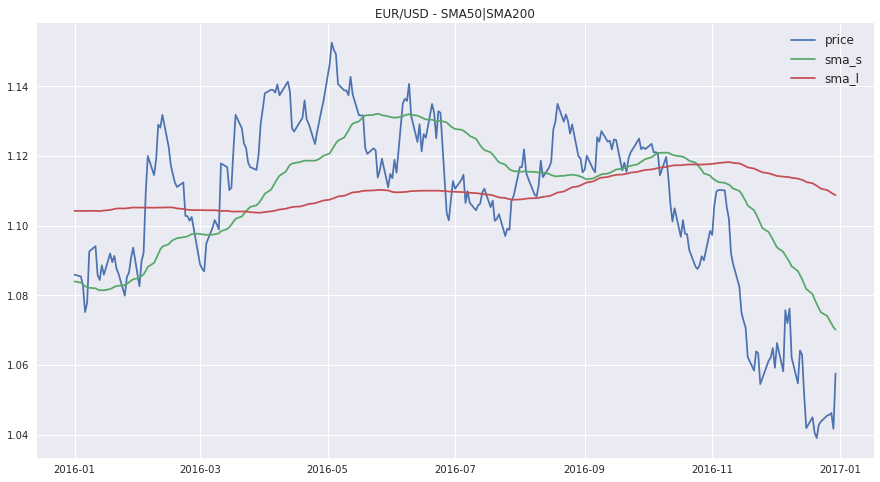

In [60]:
# plot just 2016
plt.figure(figsize=(15, 8))
plt.title(f'EUR/USD - SMA{sma_s}|SMA{sma_l}')
plt.plot(df.loc['2016'])
plt.legend(df, fontsize=12)
plt.show()

In [62]:
# Create a position column
import numpy as np
df["position"] = np.where(df.sma_s > df.sma_l, 1, -1)
df

,price,sma_s,sma_l,position
Date,,,,
2004-10-06,1.228094,1.221318,1.226222,-1
2004-10-07,1.229906,1.221840,1.226081,-1
2004-10-08,1.241003,1.222628,1.225995,-1
2004-10-11,1.238405,1.223352,1.225843,-1
2004-10-12,1.232104,1.223888,1.225643,-1
...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1
2020-06-25,1.125087,1.102486,1.103540,-1
2020-06-26,1.122208,1.103213,1.103627,-1


<AxesSubplot:xlabel='Date'>

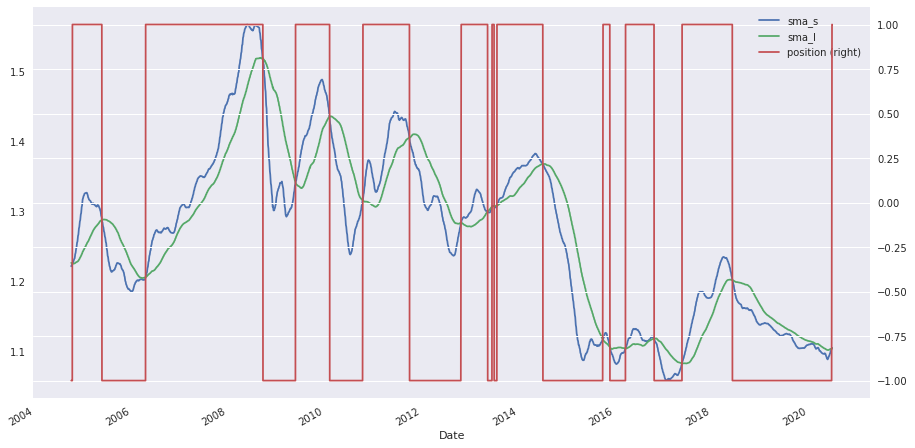

In [66]:
# Draw position onto the chart
df.loc[:, ["sma_s", "sma_l", "position"]].plot(secondary_y="position", figsize=(15, 8))

## Back-testing vectorized strategy (SMA crossover)
We vectorized our strategy with the position column having one of 3 values (-1, 0, 1).
To back-test our strategy, we assume the following:
- Zero trading cost

### Questions
- If we apply this strategy, how do we sell? Do we just sell what we have and wait? Do we short-sell the asset?

In [68]:
# Add strategy column where we multiply today's return with yesterday's position
df["returns"] = np.log(df.price.div(df.price.shift(1)))

In [71]:
df["strategy"] = df.returns.mul(df.position.shift(1))
df

,price,sma_s,sma_l,position,returns,strategy
Date,,,,,,
2004-10-06,1.228094,1.221318,1.226222,-1,NaN,NaN
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102
...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562


In [72]:
df.dropna(inplace=True)

In [73]:
# Absolute performance
df[["returns", "strategy"]].sum()

returns    -0.087929
strategy    0.249591
dtype: float64

In [77]:
# value of $1 over the period (16 years)
df[["returns", "strategy"]].sum().apply(np.exp)

returns     0.915826
strategy    1.283500
dtype: float64

In [76]:
# annualized return
df[["returns", "strategy"]].mean() * 252

returns    -0.005438
strategy    0.015435
dtype: float64

In [78]:
# annualized risk
df[["returns", "strategy"]].std() * np.sqrt(252)

returns     0.120806
strategy    0.120802
dtype: float64

In [82]:
# cumulative returns and strategy
# it's easier to read when converted back to the original value
df["creturns"] = df.returns.cumsum().apply(np.exp)
df["cstrategy"] = df.strategy.cumsum().apply(np.exp)
df




,price,sma_s,sma_l,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475,1.001476,0.998526
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982,1.010511,0.989598
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095,1.008396,0.991673
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102,1.003265,0.996746
2004-10-13,1.234903,1.224466,1.225497,-1,0.002270,-0.002270,1.005545,0.994486
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892,0.921130,1.271272
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449,0.916125,1.278218
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562,0.913781,1.281497


<AxesSubplot:title={'center':'EUR/USD - SMA50 | SMA200'}, xlabel='Date'>

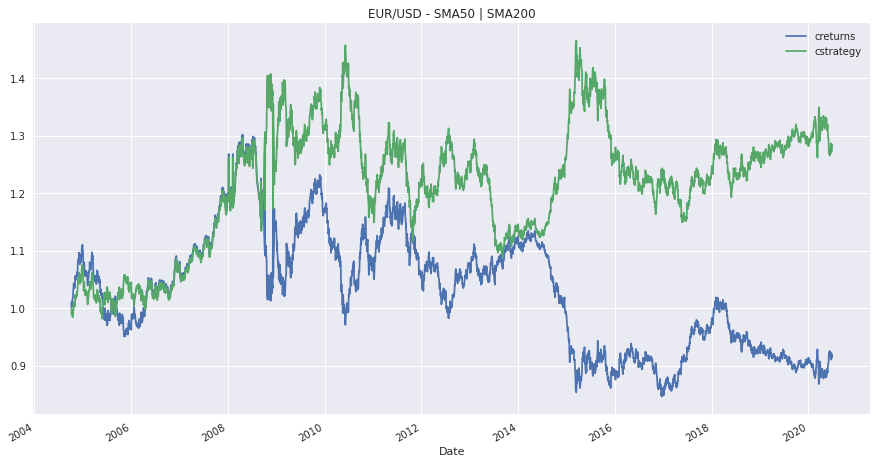

In [84]:
# chart cumulative returns and strategy
# This compares performance of the buy-and-hold vs MA crossover strategy over the period
df[["creturns", "cstrategy"]].plot(figsize=(15, 8), title=f"EUR/USD - SMA{sma_s} | SMA{sma_l}")


In [87]:
# Relative performance against the benchmark (buy-and-hold)
outperf = df.cstrategy[-1] - df.creturns[-1]

In [86]:
outperf

0.3676743925451291

## SMA strategy optimization
Find the best window for the moving averages that maximizes the performance.

In [88]:
sma_s_range = range(1, 75)
sma_l_range = range(100, 250)

In [120]:
from itertools import product
combination_generator = product(sma_s_range, sma_l_range)
combinations = list(combination_generator)
len(combinations)

11100

In [123]:
combinations[0]

(1, 100)

In [100]:
from typing import Tuple
from pandas import Series, DataFrame

def get_perf(df: DataFrame, sma: Tuple[int, int]):
    copy = df.copy()
    sma_s = sma[0]
    sma_l = sma[1]
    copy["returns"] = np.log(copy["price"].div(copy["price"].shift(1)))
    copy["sma_s"] = copy["price"].rolling(sma_s).mean()
    copy["sma_l"] = copy["price"].rolling(sma_l).mean()
    copy.dropna(inplace=True)
    copy["position"] = np.where(copy["sma_s"] > copy["sma_l"], 1, -1)
    copy["strategy"] = copy["returns"] * copy["position"].shift(1)
    copy.dropna(inplace=True)
    return np.exp(copy["strategy"].sum())

    


In [101]:
get_perf(df, (50, 200))

1.256901123292113

In [121]:
results = []
for sma_pair in combinations:
    perf = get_perf(df, sma_pair)
    results.append(perf)
results

[0.5425579940741603,
 0.5376472170563286,
 0.556924787028869,
 0.5692540400794461,
 0.6114289770421045,
 0.6326244325156501,
 0.6386348008327853,
 0.6428018037163697,
 0.720203903553584,
 0.6685732278526622,
 0.6991094361057155,
 0.6997663322314703,
 0.7054069380318743,
 0.7357932540232685,
 0.7049597702762589,
 0.6997054028100826,
 0.708196671001337,
 0.7551140440598266,
 0.7820239602275725,
 0.7778913385670794,
 0.7740246442944492,
 0.8140846388153529,
 0.7964240178073945,
 0.8213876106381836,
 0.8551981716544054,
 0.8613945631635078,
 0.8545835392532477,
 0.8172615256559677,
 0.8528102886919606,
 0.8676976352837646,
 0.9520792812249534,
 0.9489458534178457,
 0.9882491409477989,
 1.0010493366410653,
 1.0334071210199605,
 1.0447800858463565,
 1.0586928117915673,
 1.0817726568031734,
 1.1240722024274743,
 1.1336462479211105,
 1.0868295735817879,
 1.1119215133213824,
 1.100887607856223,
 1.1507220711475095,
 1.1161417851998017,
 1.0805215542989846,
 1.074528011504208,
 1.141135074175987

In [127]:
np.max(results)

2.406764486688558

In [128]:
max_index = np.argmax(results)
max_index

6936

In [122]:
combinations[max_index]

(47, 136)

In [130]:
# Create the dataframe of the series of combinations and performances
perf_df = DataFrame(data = { 'combinations': combinations, 'perf': results})
perf_df.head()

,combinations,perf
0,"(1, 100)",0.542558
1,"(1, 101)",0.537647
2,"(1, 102)",0.556925
3,"(1, 103)",0.569254
4,"(1, 104)",0.611429


In [131]:
# Get 5 best/worst combinations
perf_df.nlargest(5, 'perf')

,combinations,perf
6936,"(47, 136)",2.406764
6787,"(46, 137)",2.387195
6636,"(45, 136)",2.384668
6785,"(46, 135)",2.378666
7235,"(49, 135)",2.356221


In [132]:
perf_df.nsmallest(5, 'perf')

,combinations,perf
1,"(1, 101)",0.537647
0,"(1, 100)",0.542558
2,"(1, 102)",0.556925
3,"(1, 103)",0.569254
4,"(1, 104)",0.611429
